# Phishing Websites Classification Using K-Nearest Neighbours (KNN)

## Introduction

Since its inception, the Internet has become an integral part of everyday life, interconnecting people, academia, businesses, and governments on a global scale. As the Internet continues to evolve and its importance grows, so does cybercrime that preys on people using the platform, and among these is phishing (Shirazi, Haefner, & Ray, 2017, p. 137).
<br><br>
Phishing is a technique that cyber criminals use to steal an Internet user's personal information. Quite often, phishing attacks take the form of a seemingly legitimate link, “exploiting the behavior of human users” into entering sensitive data such as usernames, passwords, or credit card information (Williams, Hinds, & Joinson, 2018, p. 1). Once this information is obtained by the perpetrator, internet users may be prone to web threats that could lead to identity theft, financial damages, etc. (Hodzic, Kevric, & Karadag, 2016, p. 249). According to IBM's Cyber Security Intelligence Index, 60 percent of all online security incidents involve human error, with phishing being responsible for 31% of attacks (IBM Security, 2020, p. 11).
<br><br>
In order to mitigate the devastating consequences of phishing attacks, it is important to be able to identify fraudulent websites and flag them as malicious. Although cybercriminals are constantly updating their methods of attack while concealing their content, patterns in the methods they use to deceive others still emerge (Milletary, 2013, p. 13). In this report, we are aiming to observe these patterns and build a model for phishing website prediction as a K-nearest neighbour classification task to answer the following question: is a website matching specific criteria a legitimate or phishing website?
<br><br>
We will be using the "Phishing Websites Data Set" published on UCI's Machine Learning Repository. This dataset contains 11055 observations from possible phishing websites. The dataset phishing criteria is divided into four sections (address bar properties, HTML/JavaScript based attributes, domain-based features, and abnormal based characteristics), and it has thirty features. Moreover, all instances are categorized as -1 for “phishing”, 0 for “suspicious” and 1 for “legitimate”.



## Methods & Results

We start by loading the necessary libraries for our analysis.

In [179]:
options(warn=-1)
library(tidyverse)
library(repr)
library(caret)
library(reshape2)
library(gridExtra)

### Loading the data

In [82]:
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff"
column_rows <- 36

# Read rows designated as column names in data set and create vector
phishing_headers <- read_delim(url, delim = " ", n_max = column_rows, skip_empty_rows = TRUE) %>%
drop_na() %>%
select (-`@relation`)
header <- as.vector(phishing_headers$phishing)

# Read remainder of data set
phishing_data <- read_csv(url, col_names = FALSE, skip = column_rows)

# Assign column header vector as column names
colnames(phishing_data) <- header

Parsed with column specification:
cols(
  `@relation` = col_character(),
  phishing = col_character()
)
Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


After loading the data into R, we use the head and tail functions to view the first and last 5 observations.

In [83]:
# View the  first and last 5 observations
head(phishing_data)
tail(phishing_data)

having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,⋯,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,1,1,1,-1,-1,-1,-1,-1,1,⋯,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,-1,0,1,-1,1,⋯,1,1,-1,-1,0,-1,1,1,1,-1
1,0,1,1,1,-1,-1,-1,-1,1,⋯,1,1,1,-1,1,-1,1,0,-1,-1
1,0,1,1,1,-1,-1,-1,1,1,⋯,1,1,-1,-1,1,-1,1,-1,1,-1
1,0,-1,1,1,-1,1,1,-1,1,⋯,-1,1,-1,-1,0,-1,1,1,1,1
-1,0,-1,1,-1,-1,1,1,-1,1,⋯,1,1,1,1,1,-1,1,-1,-1,1


having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,⋯,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,-1,1,1,-1,-1,1,-1,1,1,⋯,1,1,-1,1,1,-1,1,1,1,-1
1,-1,1,-1,1,1,1,1,-1,-1,⋯,-1,-1,1,1,-1,-1,1,1,1,1
-1,1,1,-1,-1,-1,1,-1,-1,-1,⋯,-1,1,1,1,1,1,1,-1,1,-1
1,-1,1,1,1,-1,1,-1,-1,1,⋯,1,1,1,1,1,-1,1,0,1,-1
-1,-1,1,1,1,-1,-1,-1,1,-1,⋯,-1,1,1,1,1,-1,1,1,1,-1
-1,-1,1,1,1,-1,-1,-1,1,1,⋯,1,1,-1,1,-1,-1,-1,1,-1,-1


### Exploring the Dataset

Before we start doing any modelling, we will explore our dataset.

We will start with counting the number of observations.

In [84]:
# Number of observations
num_obs <- nrow(phishing_data)
num_obs

[1] 11055

Descriptive statistics can provide us brief descriptive coefficients that will help us summarize our dataset. We will use the code below to compute the descriptive statistics.

In [85]:
# summary stats
do.call(cbind, lapply(phishing_data, summary))

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,⋯,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
Min.,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1.0000000,-1.00000000,-1.0000000,-1.0000000,-1.0000000,⋯,-1.0000000,-1.0000000,-1.00000000,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.0000000
1st Qu.,-1.0000000,-1.0000000,1.0000000,1.000000,1.0000000,-1.0000000,-1.00000000,-1.0000000,-1.0000000,1.0000000,⋯,1.0000000,1.0000000,-1.00000000,-1.0000000,0.0000000,-1.0000000,1.0000000,0.0000000,1.0000000,-1.0000000
Median,1.0000000,-1.0000000,1.0000000,1.000000,1.0000000,-1.0000000,0.00000000,1.0000000,-1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.00000000,1.0000000,1.0000000,-1.0000000,1.0000000,0.0000000,1.0000000,1.0000000
Mean,0.3137947,-0.6331976,0.7387607,0.700588,0.7414744,-0.7349616,0.06395296,0.2509272,-0.3367707,0.6285844,⋯,0.6133876,0.8169154,0.06123926,0.3771144,0.2872908,-0.4836725,0.7215739,0.3440072,0.7195839,0.1138851
3rd Qu.,1.0000000,-1.0000000,1.0000000,1.000000,1.0000000,-1.0000000,1.00000000,1.0000000,1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.00000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
Max.,1.0000000,1.0000000,1.0000000,1.000000,1.0000000,1.0000000,1.00000000,1.0000000,1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.00000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000


We see that our target variable "result" has a median of 1, and this could be hinting that our dataset set has more legitimate website compared to phishing.

Next, we will look for any missing values.

In [86]:
# Missing values

missing_values <- phishing_data %>%
    select(everything()) %>%
    summarize_all(funs(sum(is.na(.))))
missing_values

having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,⋯,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


There are no missing values, and therefore there is no need to drop or replace any values.

Then, we will identify the data type of each column.

In [87]:
# the data type of each column
sapply(phishing_data, class)

having_IP_Address                  URL_Length 
                  "numeric"                   "numeric" 
         Shortining_Service            having_At_Symbol 
                  "numeric"                   "numeric" 
   double_slash_redirecting               Prefix_Suffix 
                  "numeric"                   "numeric" 
          having_Sub_Domain              SSLfinal_State 
                  "numeric"                   "numeric" 
Domain_registeration_length                     Favicon 
                  "numeric"                   "numeric" 
                       port                 HTTPS_token 
                  "numeric"                   "numeric" 
                Request_URL               URL_of_Anchor 
                  "numeric"                   "numeric" 
              Links_in_tags                         SFH 
                  "numeric"                   "numeric" 
        Submitting_to_email                Abnormal_URL 
                  "numeric"                   "numeric" 
                   Redirect                on_mouseover 
                  "numeric"                   "numeric" 
                 RightClick                 popUpWidnow 
                  "numeric"                   "numeric" 
                     Iframe               age_of_domain 
                  "numeric"                   "numeric" 
                  DNSRecord                 web_traffic 
                  "numeric"                   "numeric" 
                  Page_Rank                Google_Index 
                  "numeric"                   "numeric" 
     Links_pointing_to_page          Statistical_report 
                  "numeric"                   "numeric" 
                     Result 
                  "numeric"

We see that our target variable, "Result", is of type numeric. However, since we need to be working with our target variable as a categorical statistical variable, we will convert it to a factor data type with the code below.


In [88]:
phishing_data <- phishing_data %>%
    mutate(Result = as.factor(Result))

Next, we will check if the dataset is balanced across the classes. We will do this by computing the number of observation and percentage of observations in each class. Afterwards, using ggplot we will graph the results.

In [89]:
# Number and percentage of observations in each class

counts <- phishing_data %>%
    group_by(Result) %>%
    summarize(n = n(),  percentage = n()/ num_obs * 100 )
counts

Result,n,percentage
<fct>,<int>,<dbl>
-1,4898,44.30574
1,6157,55.69426


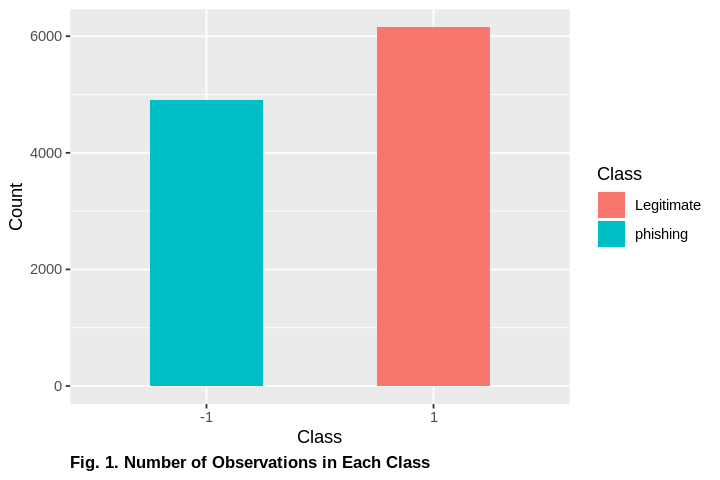

In [90]:
# Visualization of the number of observations

# Choosing the size of the graph
options(repr.plot.width = 6, repr.plot.height = 4)

# Adding the classes' names to the counts dataframe 
class = c("phishing", "Legitimate")
class_bind <- cbind(counts, class)

# Plotting
counts_graph <- counts %>%
    ggplot(aes(x = Result, y = n, width = 0.5, fill = class)) +
    geom_bar(stat = "identity") +
    xlab("Class") +
    ylab("Count") +
    theme(plot.caption = element_text(hjust = 0, size = 10, face = "bold")) +
    labs(caption = "Fig. 1. Number of Observations in Each Class", fill = "Class")
counts_graph

In Figure 1, we observe that our dataset is balanced across classes. 

Therefore, apart from changing the data type of the target variable, no further data wrangling and cleaning is required for the KNN algorithm.

### Correlation Between Variables

To help us choose our predictors, in this section we will look at the correlation coefficients between our variable using a correlation matrix. Then, we will visualize the correlation matrix as a heatmap.

First, we have to change the type of our target variable, "Result", to the data type of numeric, so we could compute the correlation matrix using the function "cor".

In [91]:
# Computing the correlation matrix

# Result must be numeric
phishing_data_numeric <- phishing_data %>%
    mutate(Result = as.numeric(Result))

correlation <- cor(phishing_data_numeric)
head(correlation)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,⋯,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000000,-0.05241074,0.40346109,0.15869895,0.39738909,-0.005256975,-0.080744639,0.07141450,-0.02273921,0.087024829,⋯,0.09688229,0.05469444,-0.010445721,-0.05073330,0.002922205,-0.091773751,0.029152889,-0.339065107,-0.019102515,0.09416009
URL_Length,-0.052410739,1.00000000,-0.09788091,-0.07510848,-0.08124708,0.055246716,0.003996879,0.04875373,-0.22189243,-0.042497220,⋯,-0.04938124,-0.01383822,0.179426424,-0.04082337,0.008992782,0.183517973,0.002902415,-0.022987416,-0.067153089,0.05742963
Shortining_Service,0.403461093,-0.09788091,1.00000000,0.10444655,0.84279562,-0.080470553,-0.041916182,-0.06142565,0.06092319,0.006100649,⋯,0.03661579,0.01658076,-0.052595837,0.43606429,-0.047074371,0.014591371,0.155843746,-0.198409770,0.085460758,-0.06796589
having_At_Symbol,0.158698951,-0.07510848,0.10444655,1.00000000,0.08695995,-0.011725539,-0.058975763,0.03122000,0.01552154,0.304899055,⋯,0.29089284,0.28440995,-0.005499097,-0.04787152,0.032918391,-0.064735176,0.037061311,-0.006080372,-0.080356601,0.05294779
double_slash_redirecting,0.397389087,-0.08124708,0.84279562,0.08695995,1.00000000,-0.085590400,-0.043078808,-0.03619990,0.04746423,0.035100076,⋯,0.05446262,0.01045864,-0.050106635,0.43140948,-0.062369383,-0.003132332,0.178414903,-0.194164634,0.070389942,-0.03860761
Prefix_Suffix,-0.005256975,0.05524672,-0.08047055,-0.01172554,-0.08559040,1.000000000,0.087891090,0.26139053,-0.09679853,-0.007504228,⋯,-0.01473259,-0.03690444,0.074116234,-0.01655556,0.110597625,-0.006833928,0.067780621,0.067423361,-0.002762565,0.34860557


Since our dataset has many columns, a good way to quickly check the correlation between our variables is by visualizing our correlation matrix as a heatmap. We will begin by defining a function that sets half of our correlation matrix to NA, since the correlation matrix has redundant information. Next, we will use the function "melt" to make a data frame which puts every measured value in a row. By doing this, we will be able to make the heatmap using ggplot.

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,⋯,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1,-0.05241074,0.40346109,0.15869895,0.39738909,-0.005256975,-0.080744639,0.07141450,-0.02273921,0.087024829,⋯,0.09688229,0.05469444,-0.010445721,-0.05073330,0.002922205,-0.091773751,0.029152889,-0.339065107,-0.019102515,0.09416009
URL_Length,NA,1.00000000,-0.09788091,-0.07510848,-0.08124708,0.055246716,0.003996879,0.04875373,-0.22189243,-0.042497220,⋯,-0.04938124,-0.01383822,0.179426424,-0.04082337,0.008992782,0.183517973,0.002902415,-0.022987416,-0.067153089,0.05742963
Shortining_Service,NA,NA,1.00000000,0.10444655,0.84279562,-0.080470553,-0.041916182,-0.06142565,0.06092319,0.006100649,⋯,0.03661579,0.01658076,-0.052595837,0.43606429,-0.047074371,0.014591371,0.155843746,-0.198409770,0.085460758,-0.06796589
having_At_Symbol,NA,NA,NA,1.00000000,0.08695995,-0.011725539,-0.058975763,0.03122000,0.01552154,0.304899055,⋯,0.29089284,0.28440995,-0.005499097,-0.04787152,0.032918391,-0.064735176,0.037061311,-0.006080372,-0.080356601,0.05294779
double_slash_redirecting,NA,NA,NA,NA,1.00000000,-0.085590400,-0.043078808,-0.03619990,0.04746423,0.035100076,⋯,0.05446262,0.01045864,-0.050106635,0.43140948,-0.062369383,-0.003132332,0.178414903,-0.194164634,0.070389942,-0.03860761
Prefix_Suffix,NA,NA,NA,NA,NA,1.000000000,0.087891090,0.26139053,-0.09679853,-0.007504228,⋯,-0.01473259,-0.03690444,0.074116234,-0.01655556,0.110597625,-0.006833928,0.067780621,0.067423361,-0.002762565,0.34860557


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,having_IP_Address,having_IP_Address,1.00000000
32,having_IP_Address,URL_Length,-0.05241074
33,URL_Length,URL_Length,1.00000000
63,having_IP_Address,Shortining_Service,0.40346109
64,URL_Length,Shortining_Service,-0.09788091
65,Shortining_Service,Shortining_Service,1.00000000


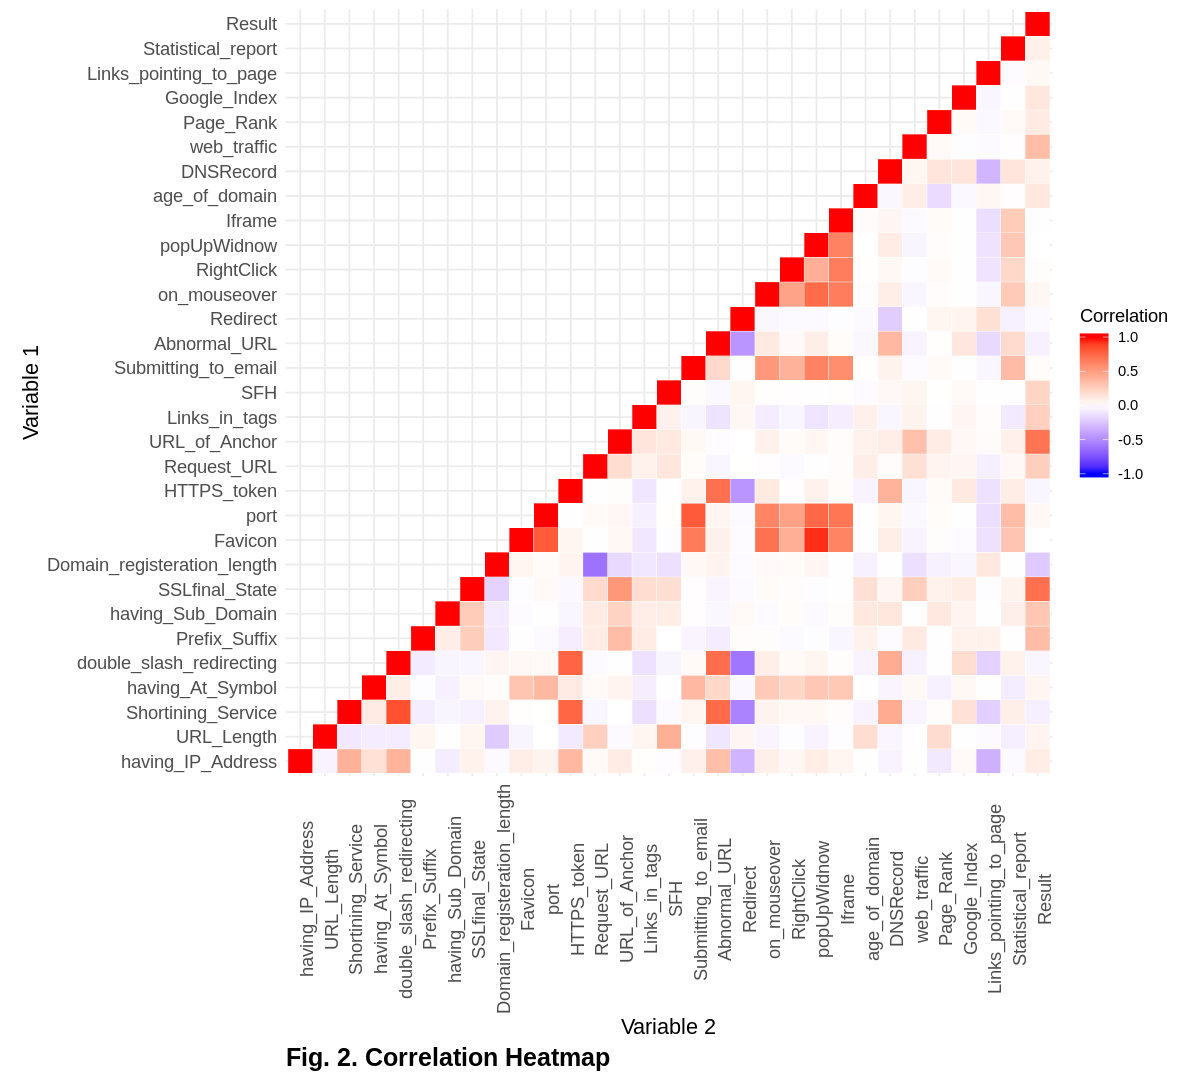

In [92]:
# Correlation heatmap

# Defining a function that sets half of the matrix to NA
top <- function(x){
    x[lower.tri(x)] <- NA
    return(x)
}

# Getting the top triangle of our matrix using the defined function
upper_triangle <- top(correlation)
head(upper_triangle)

# melting the correlation matrix
correlation_melted <- melt(upper_triangle, na.rm = TRUE)
head(correlation_melted)

# Heatmap 
options(repr.plot.width = 10 , repr.plot.height = 9)
correlation_heatmap <- correlation_melted %>%
    ggplot(aes(x = Var2, y = Var1, fill = value)) +
    geom_tile(color = "white") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, vjust = 1, size = 11), 
          axis.text.y = element_text(size = 11), 
          plot.caption = element_text(hjust = 0, size = 15, face = "bold"),
          axis.title = element_text(size = 13)) +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0,
                        limit = c(-1,1), space = "Lab", name = "Correlation") + 
    xlab("Variable 2") +
    ylab("Variable 1") +
    labs(caption = "Fig. 2. Correlation Heatmap") +
    coord_fixed() # to make sure that the units x and y axes have the same length
    

    
    
correlation_heatmap

In figure 2, the positive correlations are represented by the color red, and negative correlations are represented by the color blue. Moreover, we have set the range of the correlation coefficients using the argument limit = c(-1,1). <br>
By constructing the heatmap we can quickly observe which variables are highly correlated with our target variable "Result", and this could help us to choose our predictors for the KNN classification. From figure 2, we observe that the variables "SSLfinal_State" and "URL_of_Anchor" stand out the most as they seem to have the highest correlations with "Result". 

Since from the heatmap we cannot observe which other variables have the highest correlations with the target variable, we will make a data frame that includes the correlations between our features and our target variable in descending order.

In [93]:
# Correlations with the target variable

# Create a data frame from the correlation matrix
cor_with_target <- correlation %>%
    data.frame(correlation)

# Move the index column to the first column
cor_with_target <- cbind(Variables = rownames(cor_with_target), cor_with_target)
rownames(cor_with_target) <- 1:nrow(cor_with_target)

# Correlations
cor_with_target <- cor_with_target %>%
    select(Variables, Result) %>%
    arrange(desc(Result)) %>%
    mutate_at(vars(Result), funs(round(., 3))) %>% # round off to three decimal digits
    slice(-1)  # removing the "Result" correlation with "Result"
    
head(cor_with_target)
tail(cor_with_target)

Variables,Result
<fct>,<dbl>
SSLfinal_State,0.715
URL_of_Anchor,0.693
Prefix_Suffix,0.349
web_traffic,0.346
having_Sub_Domain,0.298
Request_URL,0.253


,Variables,Result
,<fct>,<dbl>
25,Redirect,-0.020
26,double_slash_redirecting,-0.039
27,HTTPS_token,-0.040
28,Abnormal_URL,-0.060
29,Shortining_Service,-0.068
30,Domain_registeration_length,-0.226


This data frame helps us determine the variables that have the highest correlations with the target variable. This will help us determine which variables we should use as predictors for the KNN classification algorithm.

### Feature Selection

In this section, we will select a subset of relevant predictors for use in our model construction. We are planning to choose 4 variables as our predictors for the KNN classification algorithm. We have seen that "SSLfinal_State" and "URL_of_Anchor" have the highest correlations with the target variable. To confirm that these two variables are good for our model and to select two other variables, we will use a decision tree and random forest for feature selection.

First, we need to split our dataset into the training and test sets. Here, we will use 75% of the data for training and 25% for testing.

In [94]:
# Splitiing the dataset into the training and test sets

# Making the random selection of the rows reproducible
set.seed(7)

set_rows <- phishing_data %>%
    select(Result) %>%
    unlist() %>% # converts "Result" to a vector
    createDataPartition(p = 0.75, list = FALSE)

# Getting the rows from the original dataset
training_set <- phishing_data %>% slice(set_rows)
test_set <- phishing_data %>% slice(-set_rows)

Below, we will get the importance of each feature using the decision tree algorithm. Next, we will plot the results.

In [21]:
# Decision Tree using rpart

set.seed(7)

# 10-fold cross-validation
control <- trainControl(method = "cv", number = 10)

# training the classifier
modelfit <- train(Result~., data = training_set, method = "rpart", trControl = control)

# Importance of each feature
rpart_importance <- varImp(modelfit, scale = FALSE)
rpart_importance

rpart variable importance

  only 20 most important variables shown (out of 30)

                            Overall
SSLfinal_State              2414.58
URL_of_Anchor               2351.78
web_traffic                  764.16
having_Sub_Domain            596.10
Prefix_Suffix                516.88
Links_in_tags                 55.31
SFH                            0.00
Redirect                       0.00
Iframe                         0.00
Submitting_to_email            0.00
popUpWidnow                    0.00
Favicon                        0.00
Abnormal_URL                   0.00
Statistical_report             0.00
age_of_domain                  0.00
port                           0.00
double_slash_redirecting       0.00
Page_Rank                      0.00
RightClick                     0.00
Domain_registeration_length    0.00

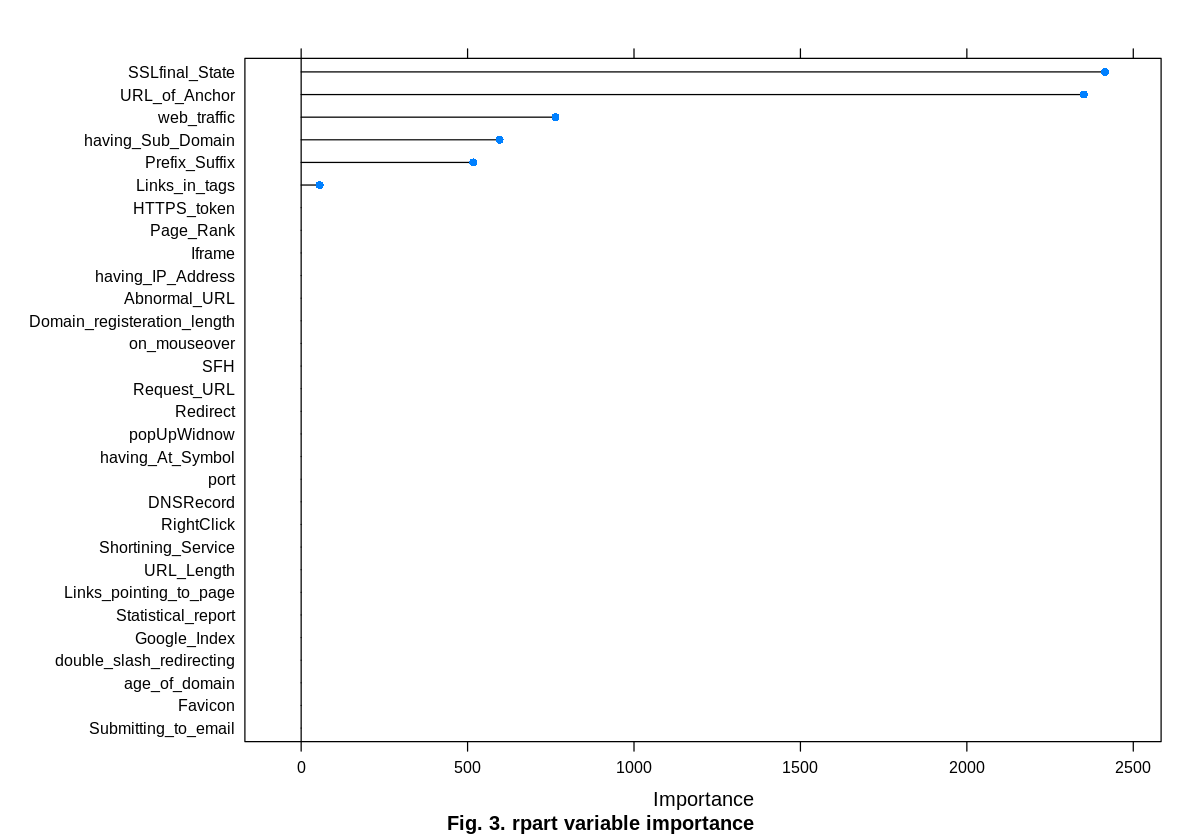

In [22]:
# Plotting

# Size of the plot
options(repr.plot.width = 10 , repr.plot.height = 7)

# making the plot
rpart_plot <- plot(rpart_importance, sub = "Fig. 3. rpart variable importance")
rpart_plot

To confirm our results above, we will compute the feature importance using random forest. Next, we will plot the results.

In [176]:
# Random Forest

set.seed(7)

# 10-fold cross-validation
control <- trainControl(method = "cv", number = 10)

# training the classifier
modelfit2 <- train(Result~., data = training_set, method = "rf", importance = TRUE, trControl = control)

# Importance of each feature
rf_importance <- varImp(modelfit2, scale = FALSE)
rf_importance

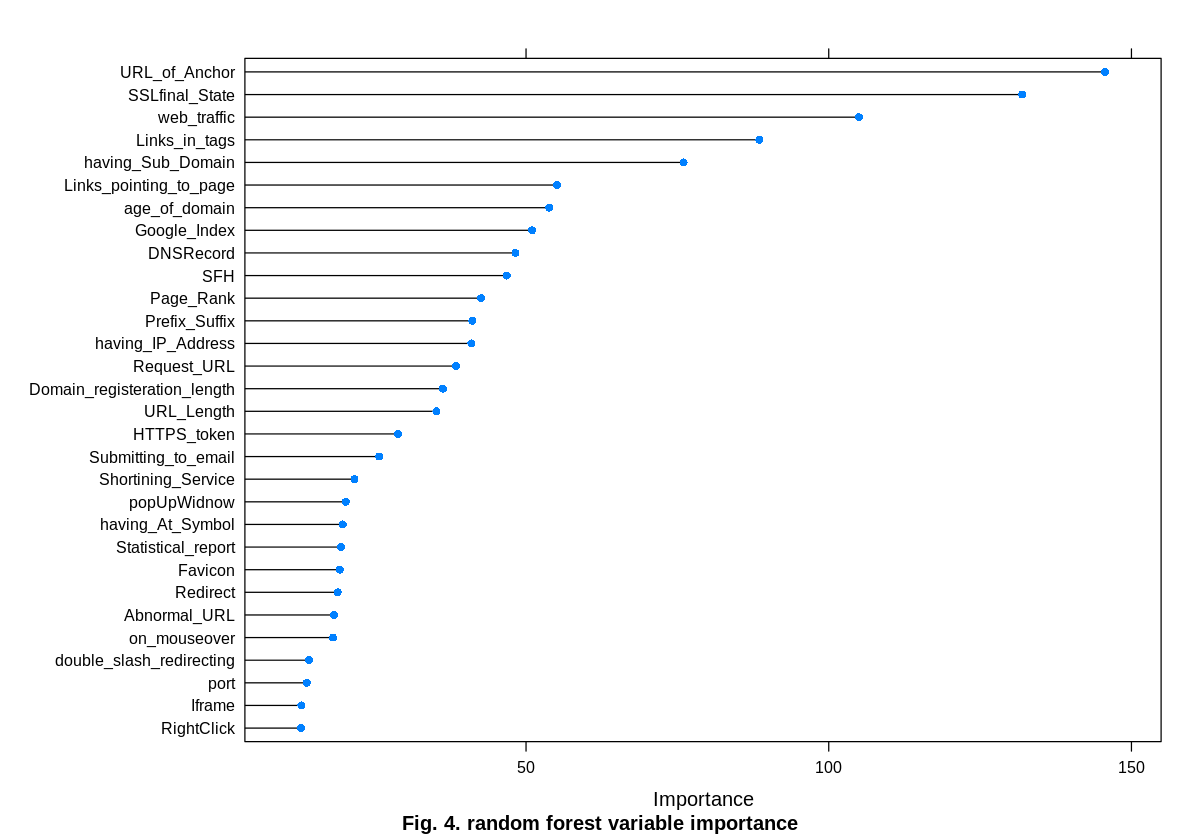

In [18]:
# Plotting

# Size of the plot
options(repr.plot.width = 10 , repr.plot.height = 7)

# Making the plot
rf_plot <- plot(rf_importance, sub = "Fig. 4. random forest variable importance")
rf_plot

To compare the results, we will use the function "grid.arrange" to plot the two variable importance plots side by side.

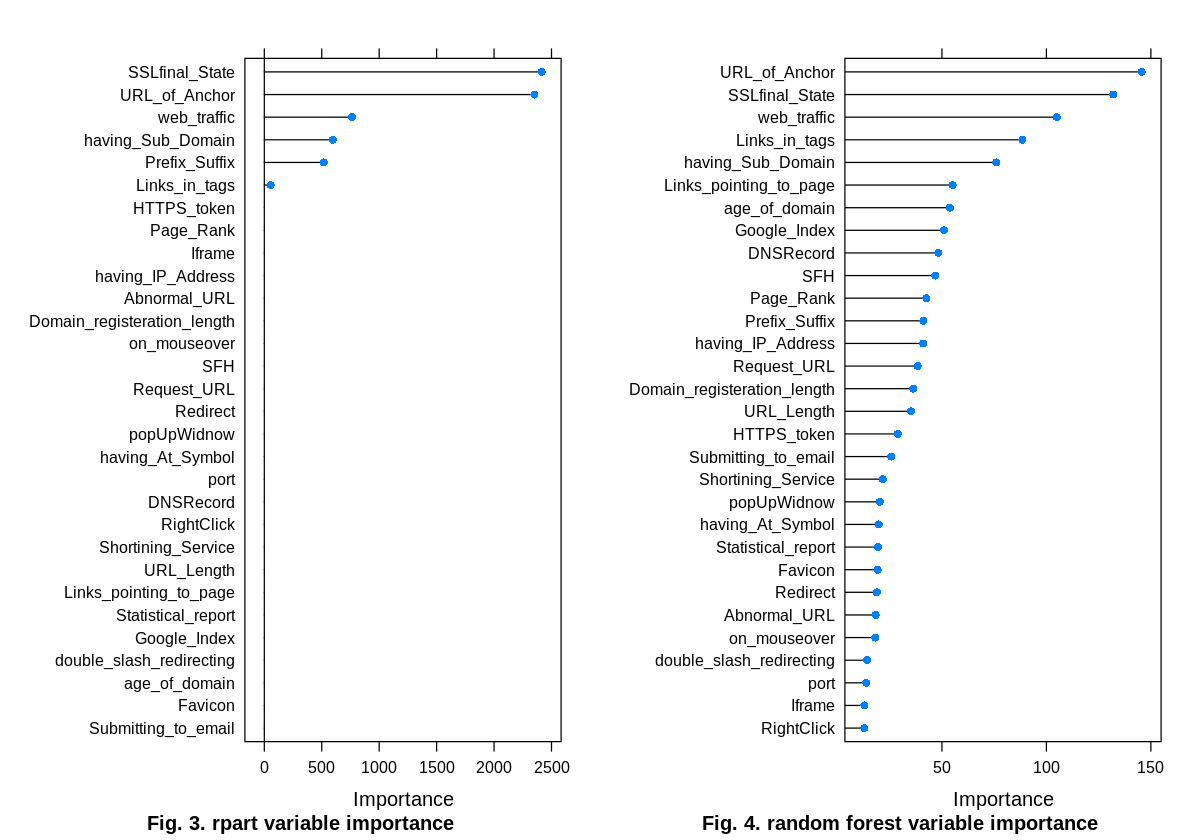

In [19]:
options(repr.plot.width = 10)
grid.arrange(rpart_plot, rf_plot, ncol = 2)

In addition to using our variable importance results, also we will be looking at the variables that have the highest correlations with the target variable.

In [183]:
# Variables that are the most correlated with the target variable

head(cor_with_target)

Variables,Result
<fct>,<dbl>
SSLfinal_State,0.715
URL_of_Anchor,0.693
Prefix_Suffix,0.349
web_traffic,0.346
having_Sub_Domain,0.298
Request_URL,0.253


Our feature selection methods indeed confirm that "SSLfinal_State" and "URL_of_Anchor" are the most relevant features. Thus, based on the results above, in addition to these two variables, we will also choose "web_traffic" and "having_Sub_Domain" as our predictors.

### K-Nearest Neighbour (KNN) Classification

In this section, we will use the "caret" package to perform k-nearest neighbour classification and assess how well our classification works.

We will start with splitting the training data into X_train and Y_train. We will do the same for the test set.

In [95]:
# Splitting the training and test sets

# Predictors
X_train <- training_set %>% 
  select(URL_of_Anchor, SSLfinal_State, web_traffic, having_Sub_Domain) %>% 
  data.frame()

# Response variable
Y_train <- training_set %>% 
  select(Result) %>% 
  unlist()

# Predictors
X_test <- test_set %>% 
    select(URL_of_Anchor, SSLfinal_State, web_traffic, having_Sub_Domain) %>% 
    data.frame()

# Response variable
Y_test <- test_set %>% 
    select(Result) %>% 
    unlist()

Next, we will apply 5-fold cross-validation on the training dataset to select which k is the most optimal for KNN classification.

In [96]:
# Choosing the optimal k

set.seed(7)

# Testing k's from 1 to 10
ks <- data.frame(k = seq(from = 1, to = 10, by = 1))

# 5-fold cross-validation
train_control <- trainControl(method = "cv", number = 5)

# Training the model
choose_k <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = ks, trControl = train_control)

choose_k

k-Nearest Neighbors 

8292 samples
   4 predictor
   2 classes: '-1', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6634, 6634, 6634, 6633, 6633 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9241427  0.8469467
   2  0.9241427  0.8469476
   3  0.9234191  0.8454714
   4  0.9230573  0.8447189
   5  0.9226955  0.8439838
   6  0.9225748  0.8437271
   7  0.9217305  0.8419915
   8  0.9202836  0.8390364
   9  0.9194397  0.8372954
  10  0.9185956  0.8355965

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 2.

Using cross validation, we get an accuracy for each value of k. We observe that by maximizing the accuracy estimate, "caret" provides a selection of k = 2. Nevertheless, it is still useful to visualize the relationship between k and accuracy.

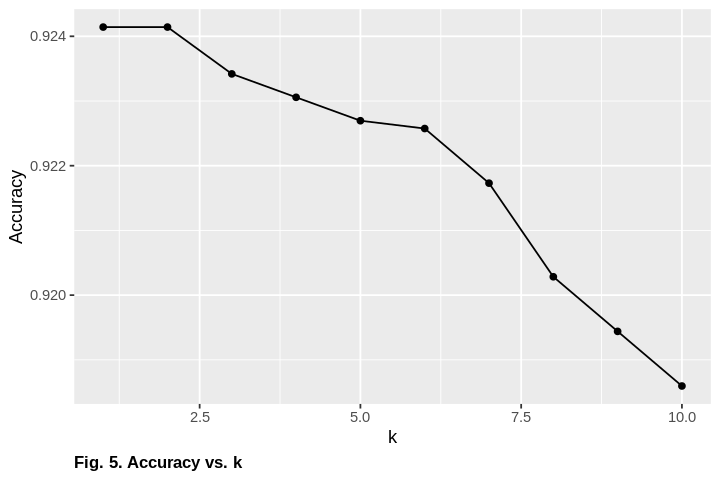

In [97]:
# Plotting k versus accuracy

k_accuracies <- choose_k$results %>%
    select(k, Accuracy)

options(repr.plot.width = 6, repr.plot.height = 4)

# Plotting
choose_k_plot <- ggplot(k_accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line() +
  theme(plot.caption = element_text(hjust = 0, size = 10, face = "bold")) +
  labs(caption = "Fig. 5. Accuracy vs. k")

choose_k_plot

In figure 5, we observe that as k increases, the accuracy does not decrease substantially. This might be explained by the fact that our predictors are categorical variables. We will explain more about this later in our analysis. For now, we should note that any choice between k = 1 and k = 10 could be reasonably justified. 
<br>
We observe that k = 1 and k = 2 have the same accuracy estimate. We have decided to choose the caret's choice of k = 2, as it estimates the highest cross-validated accuracy. Since k is even there might be cases with a tie in the majority class voting. However, this should not be concerning since k = 2 performs as well as when k is odd (k = 1). Moreover, we are not overfitting the data by choosing k = 1. 

Now that we have applied cross-validation to choose the optimal k, we can build our model.

In [180]:
# Building the model 

set.seed(7)

k <- data.frame(k = 2)

# Training the model
model <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)
model


k-Nearest Neighbors 

8292 samples
   4 predictor
   2 classes: '-1', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 8292, 8292, 8292, 8292, 8292, 8292, ... 
Resampling results:

  Accuracy   Kappa    
  0.9223832  0.8431857

Tuning parameter 'k' was held constant at a value of 2

Now that we have built our KNN model, we can use the model to predict on both the training dataset and the test dataset.

In [99]:
# Train accuracy

set.seed(7)

training_pred <- predict(model, X_train)

# Getting the statistics about the quality of the model
training_results <- confusionMatrix(training_pred, Y_train)

# Accuracy
training_results$overall[1]

Accuracy 
0.9246261

In [100]:
# Test accuracy
set.seed(7)

test_pred <- predict(model, X_test)
test_results <- confusionMatrix(test_pred, Y_test)

# Accuracy
test_results$overall[1]

Accuracy 
0.922548

The train accuracy is around 0.925. From this value we can say that our KNN classifier predicted the correct class labels on approximately 92.5% of the examples in the training set. Furthermore, the test accuracy is around 0.923, and thus the KNN classifier predicted the correct class labels on roughly 92.3% of the examples in the test set.

Although some other types of classifiers are more ideal in dealing with categorical variables, it seems like the KNN algorithm has done a decent job in predicting the class labels for both the training and the test sets. We need to note that the KNN algorithm makes predictions using the Euclidean distance to find the k most similar observations and then uses the majority class as the predictions for the new observations. Since our predictors are categorical variables and we chose k = 2, a new observation will have the same distance to the 2 most similar observations. Then, the majority class of these 2 most similar observations are used to predict the class for the new observations. <br>
The predictors that we chose have high correlations with the target variable, and based on variable importance we can say that they were used extensively to make accurate predictions. Thus, it makes sense that our prediction accuracy is pretty high, although KNN might not be the best classifier for categorical variables. 

### Visualization of the Classification Analysis

In this section, we will create a visualization of the KNN classification analysis. We are aiming to visualize which unique combinations of the observations had the most incorrect predictions. In addition, we will visualize the proportions of the correct and incorrect predictions for the most incorrectly predicted combinations of observations.

We start by extracting the observations with incorrect predictions using the "slice" function.

In [113]:
# Incorrectly predicted observations

sliced_wrong <- X_test %>%
    slice(which(test_pred != Y_test))
head(sliced_wrong)

URL_of_Anchor,SSLfinal_State,web_traffic,having_Sub_Domain
<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,-1
0,1,0,1
0,1,0,-1
0,1,0,1
0,-1,1,-1
0,1,0,0


Next, we will count the occurrences in unique group combinations and then select the 10 combinations with the highest count.

In [114]:
# unique group combinations for incorrect predictions

combinations_wrong <- sliced_wrong %>%
    group_by(URL_of_Anchor, SSLfinal_State, web_traffic, having_Sub_Domain) %>%
    summarize(n_wrong= n()) %>%
    arrange(-n_wrong) %>%
    head(n = 10)
combinations_wrong

URL_of_Anchor,SSLfinal_State,web_traffic,having_Sub_Domain,n_wrong
<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,-1,1,0,32
0,1,0,-1,25
0,1,0,0,21
0,1,0,1,19
0,1,1,-1,18
0,1,1,0,15
0,-1,1,-1,13
0,-1,0,1,11
0,-1,1,1,8


We will do the same for the observations with the correct predictions.

In [115]:
# Correctly predicted observations

sliced_correct <- X_test %>%
    slice(which(test_pred == Y_test))
head(sliced_correct)

URL_of_Anchor,SSLfinal_State,web_traffic,having_Sub_Domain
<dbl>,<dbl>,<dbl>,<dbl>
-1,-1,-1,-1
0,-1,1,-1
0,-1,1,-1
0,1,1,-1
1,1,1,0
1,1,-1,1


In [116]:
# Unique group combinations for correct predictions

combinations_correct <- sliced_correct %>%
    group_by(URL_of_Anchor, SSLfinal_State, web_traffic, having_Sub_Domain) %>%
    summarize(n_correct = n()) %>%
    arrange(-n_correct) 
head(combinations_correct)

URL_of_Anchor,SSLfinal_State,web_traffic,having_Sub_Domain,n_correct
<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,1,1,1,286
1,1,1,1,191
0,1,1,0,146
0,1,1,-1,143
1,1,1,-1,112
-1,-1,-1,0,104


Next, we will extract the combinations with the most incorrect predictions from the correctly predicted data frame.

In [117]:
# Combinations with incorrect predictions

combinations_wrong 

URL_of_Anchor,SSLfinal_State,web_traffic,having_Sub_Domain,n_wrong
<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,-1,1,0,32
0,1,0,-1,25
0,1,0,0,21
0,1,0,1,19
0,1,1,-1,18
0,1,1,0,15
0,-1,1,-1,13
0,-1,0,1,11
0,-1,1,1,8


In [118]:
# Extracting the correctly predicted combinations

a <- combinations_correct %>%
    filter(URL_of_Anchor == "0", SSLfinal_State == "-1", web_traffic == "1", having_Sub_Domain == "0")
b <- combinations_correct %>%
    filter(URL_of_Anchor == "0", SSLfinal_State == "1", web_traffic == "0", having_Sub_Domain == "-1")
c <- combinations_correct %>%
    filter(URL_of_Anchor == "0", SSLfinal_State == "1", web_traffic == "0", having_Sub_Domain == "0")
d <- combinations_correct %>%
    filter(URL_of_Anchor == "0", SSLfinal_State == "1", web_traffic == "0", having_Sub_Domain == "1")
e <- combinations_correct %>%
    filter(URL_of_Anchor == "0", SSLfinal_State == "1", web_traffic == "1", having_Sub_Domain == "-1")
f <- combinations_correct %>%
    filter(URL_of_Anchor == "0", SSLfinal_State == "1", web_traffic == "1", having_Sub_Domain == "0")
g <- combinations_correct %>%
    filter(URL_of_Anchor == "0", SSLfinal_State == "-1", web_traffic == "1", having_Sub_Domain == "-1")
h <- combinations_correct %>%
    filter(URL_of_Anchor == "0", SSLfinal_State == "-1", web_traffic == "0", having_Sub_Domain == "1")
i <- combinations_correct %>%
    filter(URL_of_Anchor == "0", SSLfinal_State == "-1", web_traffic == "1", having_Sub_Domain == "1")
j <- combinations_correct %>%
    filter(URL_of_Anchor == "-1", SSLfinal_State == "1", web_traffic == "1", having_Sub_Domain == "-1")

# Making a data frame
correct <- rbind(a,b,c,d,e,f,g,h,i,j)

# Assigning combinations names
correct["combinations"] <- c("a", "b", "c", "d", "e", "f", "g", "h", "i", "j")
correct


URL_of_Anchor,SSLfinal_State,web_traffic,having_Sub_Domain,n_correct,combinations
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
0,-1,1,0,51,a
0,1,0,-1,26,b
0,1,0,0,15,c
0,1,0,1,91,d
0,1,1,-1,143,e
0,1,1,0,146,f
0,-1,1,-1,40,g
0,-1,0,1,19,h
0,-1,1,1,41,i


In [119]:
wrong <- combinations_wrong

# Assigning combinations names
wrong["combinations"] <- c("a", "b", "c", "d", "e", "f", "g", "h", "i", "j")
wrong


URL_of_Anchor,SSLfinal_State,web_traffic,having_Sub_Domain,n_wrong,combinations
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
0,-1,1,0,32,a
0,1,0,-1,25,b
0,1,0,0,21,c
0,1,0,1,19,d
0,1,1,-1,18,e
0,1,1,0,15,f
0,-1,1,-1,13,g
0,-1,0,1,11,h
0,-1,1,1,8,i


In the next steps, we will first merge the "correct" and "wrong" data frames and select the columns we will need. Afterwards, we will melt the resulting data frame.

In [134]:
# Merging 

merged_data <- merge(correct, wrong)
selected <- merged_data %>%
    select(combinations, n_correct, n_wrong)
    
selected

combinations,n_correct,n_wrong
<chr>,<int>,<int>
j,6,5
h,19,11
g,40,13
a,51,32
i,41,8
b,26,25
c,15,21
d,91,19
e,143,18


In [158]:
# melting

selected.m <- melt(selected, id.vars = "combinations")
head(selected.m)

combinations,variable,value
<chr>,<fct>,<int>
j,n_correct,6
h,n_correct,19
g,n_correct,40
a,n_correct,51
i,n_correct,41
b,n_correct,26


Using the results above, we are now ready to create a visualization of the KNN classification analysis.

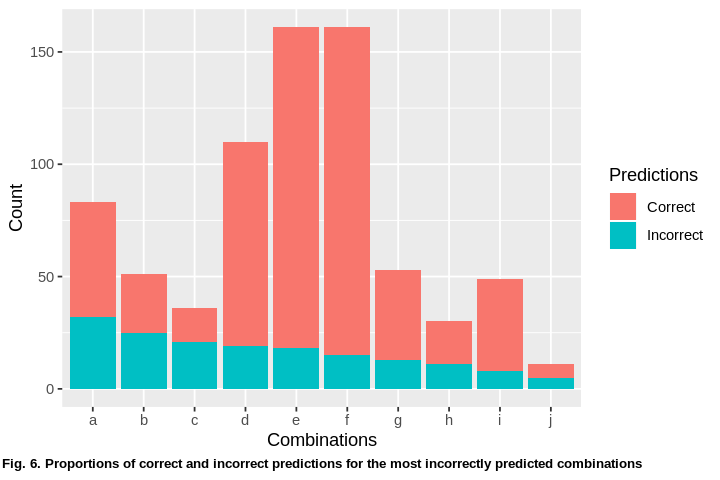

In [177]:
# Visualization of the classification analysis

knn_plot <- selected.m %>%
    ggplot(aes(x = combinations, y = value, fill = factor(variable, labels = c("Correct", "Incorrect")))) +
    geom_bar(stat = "identity", position = "stack") +
    labs(x = "Combinations", y = "Count", fill = "Predictions", caption = "Fig. 6. Proportions of correct and incorrect predictions for the most incorrectly predicted combinations") +
    theme(plot.caption = element_text(hjust = 0.5, size = 8, face = "bold"))

knn_plot    
    

In figure 6, we see that the combinations a, b, c, h and j have relatively high proportions of incorrect predictions. This could indicate that adding more relevant predictors might decrease the number of incorrect predictions in these combinations resulting in an improvement of our prediction accuracy.

## Discussion


Phishing websites present a major threat to a large population in today’s internet-savvy age. This threat comes in many ways, and targets unsuspecting users through seemingly legitimate websites.<br>
We will first summarize our findings.
<ol>
<li>After reading, cleaning, and exploring the data, we concluded that our data had more legitimate websites than phishing. </li><br>
    
<li>To determine the correlation between our variables and the target variable we used heat maps to visualise the correlation matrix. “SSLfinal_State" and "URL_of_Anchor" had the highest correlation with the target variable. </li><br>
<li>To confirm the findings above, we used cross validation to obtain a decision tree (using ‘rpart), and random forests (using ‘rf). On visualising, we determined that our findings in step 2 were correct. </li><br>
<li>We chose SSLfinal_State", "URL_of_Anchor", "web_traffic", and "having_Sub_Domain" as predictors. </li><br>
<li>Proceeding with k-NN classification: <br><br>
a. Using 5-fold cross-validation, determine the optimal choice of $k = 2$. <br><br>
b. With choice of $k = 2$, re-trained the classifier on training data and obtained $92.46%$ accuracy. <br><br>
c. Evaluating the classifier on the test set gave accuracy of $92.25%$. 
    </li>
</ol>
<br>
Our findings suggest that certain features of the website’s URL can indeed be some of the most important factors while classifying a website as ‘legitimate’ or ‘phishing’. However, this is not foolproof since certain features that don’t show up in the URL such as web traffic need to be considered. Hence, it is relatively more difficult to identify accurately whether or not a website is legitimate by simply looking at the URL.<br><br>
Our findings show that the most common method of classifying websites as phishing that relies on blacklists (Akanbi, Amiri, & Fazeldehkordi, 2015) such as the google index is obsolete. We maintain that our model does equip frequent web users with the knowledge of identifying suspicious or phishing websites by looking at features like sub domains and anchors in a URL. 
This model gives a certain accuracy on some limited data. However, phishing websites emerge rapidly. Therefore, the real time effectiveness of such a model cannot be guaranteed. A further area of study is to develop real time responses to identify rapidly evolving phishing websites; this may involve using machine learning or artificial intelligence that make use of such models to identify similarities and differences between phishing websites.


## References

Akanbi, O. A., Amiri I. S., & Fazeldehkordi, E. (2015). A machine-learning approach to detection and defense. ScienceDirect, 1 - 8, doi: 10.1016/B978-0-12-802927-5.00001-0   <br><br>

Hodžić, A., Kevrić, J., & Karadag, A. (2016). Comparison of machine learning techniques in phishing website classification. In International Conference on Economic and Social Studies (ICESoS'16) (pp. 249-256).
<br><br>

IBM Security. X-Force Threat Intelligence Index (2020th ed., pp. 11–11). IBM X-Force Incident Response and Intelligence Services (IRIS). Retrieved from https://www.ibm.com/security/data-breach/threat-intelligence?ce=ISM0484&ct=SWG&cmp=IBMSocial&cm=h&cr=Security&ccy=US 
<br><br>

Milletary, J. (2013). Technical Trends in Phishing Attacks (pp. 13–13). United States Computer Emergency Readiness Team. Retrieved from http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.146.836&rep=rep1&type=pdf
<br><br>

Shirazi, H., Haefner, K., & Ray, I. (2017). Fresh-Phish: A Framework for Auto-Detection of Phishing Websites. 2017 IEEE International Conference on Information Reuse and Integration (IRI). doi: 10.1109/iri.2017.40
<br><br>

UCI Machine Learning Repository: Phishing Websites Data Set. (n.d.). Retrieved from https://archive.ics.uci.edu/ml/datasets/Phishing+Websites
<br><br>

Williams, E. J., Hinds, J., & Joinson, A. N. (2018). Exploring susceptibility to phishing in the workplace. International Journal of Human-Computer Studies, 120, 1–13. doi: 10.1016/j.ijhcs.2018.06.004